In [70]:
import math
import numpy as np
import scipy
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.stats import binom, hypergeom

%matplotlib inline

ref https://nbviewer.jupyter.org/github/kellieotto/StatMoments/blob/master/PSM.ipynb

In [4]:
treatment = pd.read_csv("/Users/nzhang/roku_daily/channel_reloading/cooper_treatment.csv")
control = pd.read_csv("/Users/nzhang/roku_daily/channel_reloading/cooper_control.csv")
data = pd.concat([treatment, control])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
data.describe()

,date_diff,num_channels_30_pre,num_days_visited_30_post,num_days_visited_30_pre,num_days_visited_60_post,num_days_visited_90_post,num_reloads_30_post,num_reloads_30_pre,num_reloads_60_post,num_reloads_90_post,sdcard,sh_30_post,sh_30_pre,sh_60_post,sh_90_post,Propensity
count,415433.000000,415433.000000,415433.000000,415433.000000,415433.000000,415433.000000,415433.000000,415433.000000,415433.000000,415433.000000,415433.000000,415433.000000,415433.000000,415433.000000,415433.000000,415433.000000
mean,424.096591,9.707705,20.128752,21.799183,39.475814,59.088797,1.286920,1.297333,2.796906,4.404515,0.008738,102.590580,103.295695,202.013947,302.435709,0.008750
std,136.620857,8.549362,10.531306,10.029386,20.049876,29.135960,11.404097,4.741898,16.999936,23.966972,0.093067,108.948898,109.767854,207.436829,304.996932,0.000081
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008674
25%,319.000000,5.000000,11.000000,15.000000,23.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.703333,18.792222,44.036389,71.243889,0.008688
50%,428.000000,8.000000,24.000000,26.000000,46.000000,68.000000,0.000000,0.000000,1.000000,1.000000,0.000000,68.866389,69.482778,139.928611,211.903056,0.008725
75%,550.000000,13.000000,30.000000,30.000000,58.000000,85.000000,1.000000,1.000000,2.000000,3.000000,0.000000,150.645556,151.438889,292.895833,436.009722,0.008785
max,799.000000,555.000000,31.000000,31.000000,61.000000,91.000000,5533.000000,231.000000,5540.000000,5543.000000,1.000000,742.985278,719.823056,1459.413611,2178.440556,0.009212


In [13]:
propensity = LogisticRegression()
propensity = propensity.fit(data[['sh_30_pre']], data.sdcard)
pscore = propensity.predict_proba(data[['sh_30_pre']])[:,1] # The predicted propensities by the model
print(pscore[:5])

data['Propensity'] = pscore

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.00890159 0.00898011 0.00870069 0.00877098 0.00868352]


In [37]:
data.head()

,benchmark_date,date_diff,device_first_linked,device_id,num_channels_30_pre,num_days_visited_30_post,num_days_visited_30_pre,num_days_visited_60_post,num_days_visited_90_post,num_reloads_30_post,num_reloads_30_pre,num_reloads_60_post,num_reloads_90_post,sdcard,sdcard_insert,sh_30_post,sh_30_pre,sh_60_post,sh_90_post,Propensity
0,NaN,548,24:09.0,7KA67F916019,17,31,31,61,85,0,2,0,0,1,10/20/18,294.208333,309.793889,564.614722,784.740556,0.008902
1,NaN,397,35:11.0,7KA67G254561,12,31,31,61,91,4,34,4,17,1,8/21/18,406.807222,414.953333,787.901944,1100.515556,0.008980
2,NaN,659,34:14.0,7KA680015986,17,20,23,46,70,0,6,0,1,1,8/12/18,82.798889,36.493611,150.783889,207.798889,0.008701
3,NaN,539,57:49.0,7KA680056261,20,17,31,46,76,0,2,0,0,1,7/7/18,79.613333,132.811111,244.979167,404.560000,0.008771
4,NaN,314,23:02.0,7KA680074973,9,19,11,37,57,0,0,1,2,1,12/12/18,36.141944,12.838056,59.859167,113.563611,0.008684


In [58]:
def Match(groups, propensity, caliper = 0.05):
    ''' 
    Inputs:
    groups = Treatment assignments.  Must be 2 groups
    propensity = Propensity scores for each observation. Propensity and groups should be in the same order (matching indices)
    caliper = Maximum difference in matched propensity scores. For now, this is a caliper on the raw
            propensity; Austin reccommends using a caliper on the logit propensity.
    
    Output:
    A series containing the individuals in the control group matched to the treatment group.
    Note that with caliper matching, not every treated individual may have a match.
    '''

    # Check inputs
    if any(propensity <=0) or any(propensity >=1):
        raise ValueError('Propensity scores must be between 0 and 1')
    elif not(0<caliper<1):
        raise ValueError('Caliper must be between 0 and 1')
    elif len(groups)!= len(propensity):
        raise ValueError('groups and propensity scores must be same dimension')
    elif len(groups.unique()) != 2:
        raise ValueError('wrong number of groups')
        
        
    # Code groups as 0 and 1
    groups = groups == groups.unique()[0]
    N = len(groups)
    N1 = groups.sum(); N2 = N-N1
    g1, g2 = propensity[groups == 1], (propensity[groups == 0])
    # Check if treatment groups got flipped - treatment (coded 1) should be the smaller
    if N1 > N2:
       N1, N2, g1, g2 = N2, N1, g2, g1 
        
        
    # Randomly permute the smaller group to get order for matching
    morder = np.random.permutation(N1)
    matches = pd.Series(np.empty(N1))
    matches[:] = np.NAN
    
    for m in morder:
        dist = abs(g1[m] - g2)
        if dist.min() <= caliper:
            matches[m] = dist.argmin()
            g2 = g2.drop(matches[m])
    
    
    treatment = pd.DataFrame(g1).reset_index()
    treatment.columns = ['tre_indx', 'Propensity']
    control = pd.DataFrame(data.iloc[matches]['Propensity']).reset_index()
    control.columns = ['ctl_indx', 'ctl_pscore']
    
    final_df = treatment.join(control)

    return final_df

In [59]:
matches = Match(data.sdcard, data.Propensity)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


In [62]:
matches.head()

,tre_indx,Propensity,ctl_indx,ctl_pscore
0,0,0.008902,96992,0.008682
1,1,0.008980,49811,0.008787
2,2,0.008701,260199,0.008675
3,3,0.008771,210662,0.008697
4,4,0.008684,30402,0.008699


In [66]:
treatment = data.iloc[matches.tre_indx]
control = data.iloc[matches.ctl_indx]
final = treatment.append(control)

In [67]:
shs = [treatment["sh_30_pre"], control["sh_30_pre"]]

No handles with labels found to put in legend.


Text(0, 0.5, 'Density')

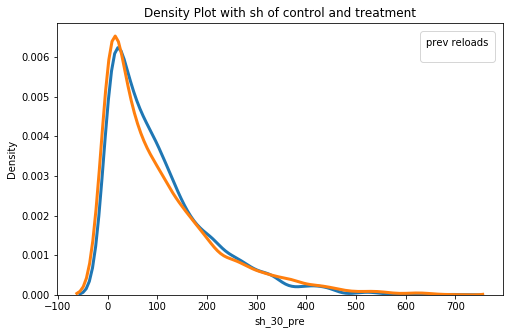

In [71]:
fig = plt.figure(figsize=(8, 5))  
for sh in shs:

    # Draw the density plot
    sns.distplot(sh, hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
 
plt.legend(prop={'size': 16}, title =  'prev reloads')
plt.title('Density Plot with sh of control and treatment')
plt.ylabel('Density')